In [1]:
import warnings
warnings.filterwarnings('ignore')

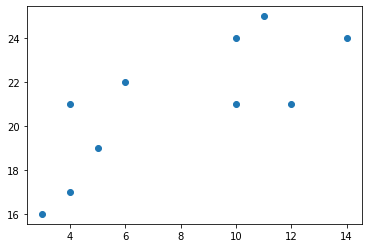

In [2]:
import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14, 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x,y)
plt.show()

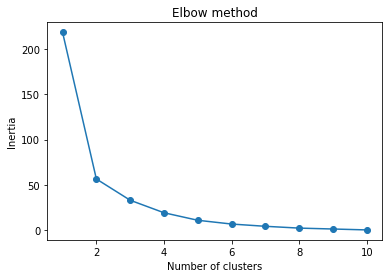

In [3]:
from sklearn.cluster import KMeans

data = list(zip(x,y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
    
plt.plot(range(1,11), inertias, marker ='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

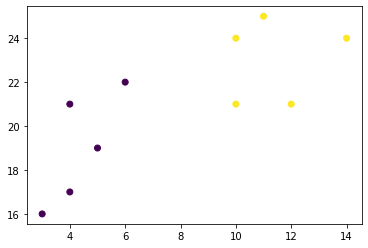

In [15]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

x = [4, 5, 10, 4, 3, 11, 14, 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

In [4]:
import pandas as pd
import math

In [5]:
retail_df = pd.read_excel('Online_Retail.xlsx')
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
retail_df = retail_df[retail_df['Quantity'] > 0]
retail_df = retail_df[retail_df['UnitPrice'] > 0]
retail_df = retail_df[retail_df['CustomerID'].notnull()]

In [9]:
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

In [10]:
retail_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
retail_df.drop_duplicates(inplace = True)

retail_df.shape

(392692, 8)

In [13]:
pd.DataFrame([{'Product' : len(retail_df['StockCode'].value_counts()),
               'Transaction':len(retail_df['InvoiceNo'].value_counts()),
               'Customer':len(retail_df['CustomerID'].value_counts())}],
             columns = ['Product', 'Transaction', 'Customer'],
             index = ['counts'])

,Product,Transaction,Customer
counts,3665,18532,4338


In [14]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [17]:
retail_df['SaleAmount'] = retail_df['UnitPrice'] = retail_df['Quantity']

In [43]:
aggregations = {
    'InvoiceNo':'count',
    'SaleAmount' : 'sum',
    'InvoiceDate' : 'max'
}

customer_df = retail_df.groupby('CustomerID').agg(aggregations)
customer_df = customer_df.reset_index()

customer_df

,CustomerID,InvoiceNo,SaleAmount,InvoiceDate
0,12346,1,74215,2011-01-18 10:01:00
1,12347,182,2458,2011-12-07 15:52:00
2,12348,31,2341,2011-09-25 13:13:00
3,12349,73,631,2011-11-21 09:51:00
4,12350,17,197,2011-02-02 16:01:00
...,...,...,...,...
4333,18280,10,45,2011-03-07 09:52:00
4334,18281,7,54,2011-06-12 10:53:00
4335,18282,12,103,2011-12-02 11:43:00
4336,18283,721,1357,2011-12-06 12:02:00


In [44]:
customer_df = customer_df.rename(columns = {'InvoiceNo':'Freq', 'InvoiceDate':'ElapsedDays'})
customer_df

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,74215,2011-01-18 10:01:00
1,12347,182,2458,2011-12-07 15:52:00
2,12348,31,2341,2011-09-25 13:13:00
3,12349,73,631,2011-11-21 09:51:00
4,12350,17,197,2011-02-02 16:01:00
...,...,...,...,...
4333,18280,10,45,2011-03-07 09:52:00
4334,18281,7,54,2011-06-12 10:53:00
4335,18282,12,103,2011-12-02 11:43:00
4336,18283,721,1357,2011-12-06 12:02:00


In [45]:
import datetime

customer_df['ElapsedDays'] = datetime.datetime(2011,12,10) - customer_df['ElapsedDays']
customer_df

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,74215,325 days 13:59:00
1,12347,182,2458,2 days 08:08:00
2,12348,31,2341,75 days 10:47:00
3,12349,73,631,18 days 14:09:00
4,12350,17,197,310 days 07:59:00
...,...,...,...,...
4333,18280,10,45,277 days 14:08:00
4334,18281,7,54,180 days 13:07:00
4335,18282,12,103,7 days 12:17:00
4336,18283,721,1357,3 days 11:58:00


In [46]:
customer_df['ElapsedDays'] = customer_df['ElapsedDays'].apply(lambda x: x.days + 1)
customer_df

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,74215,326
1,12347,182,2458,3
2,12348,31,2341,76
3,12349,73,631,19
4,12350,17,197,311
...,...,...,...,...
4333,18280,10,45,278
4334,18281,7,54,181
4335,18282,12,103,8
4336,18283,721,1357,4


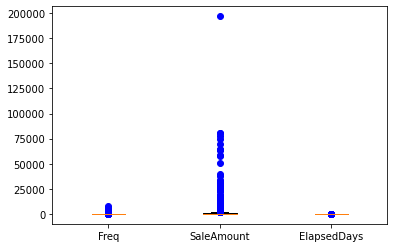

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
ax.boxplot([customer_df['Freq'],
            customer_df['SaleAmount'],
            customer_df['ElapsedDays']],
           sym = 'bo')
plt.xticks([1, 2, 3], ['Freq', 'SaleAmount', 'ElapsedDays'])
plt.show()
        

In [48]:
import numpy as np

customer_df['Freq_log'] = np.log1p(customer_df['Freq'])
customer_df['SaleAmount_log'] = np.log1p(customer_df['SaleAmount'])
customer_df['ElapsedDays_log'] = np.log1p(customer_df['ElapsedDays'])

customer_df[['Freq_log','SaleAmount_log','ElapsedDays_log']]

,Freq_log,SaleAmount_log,ElapsedDays_log
0,0.693147,11.214735,5.789960
1,5.209486,7.807510,1.386294
2,3.465736,7.758761,4.343805
3,4.304065,6.448889,2.995732
4,2.890372,5.288267,5.743003
...,...,...,...
4333,2.397895,3.828641,5.631212
4334,2.079442,4.007333,5.204007
4335,2.564949,4.644391,2.197225
4336,6.582025,7.213768,1.609438


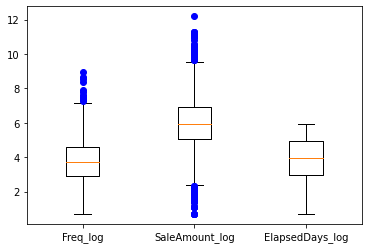

In [49]:
fig, ax = plt.subplots()
ax.boxplot([customer_df['Freq_log'],
            customer_df['SaleAmount_log'],
            customer_df['ElapsedDays_log']],
           sym = 'bo')
plt.xticks([1,2,3], ['Freq_log','SaleAmount_log','ElapsedDays_log'])
plt.show()

In [50]:
from sklearn.preprocessing import StandardScaler

X_features = customer_df[['Freq_log', 'SaleAmount_log','ElapsedDays_log']].values

X_features_scaled = StandardScaler().fit_transform(X_features)

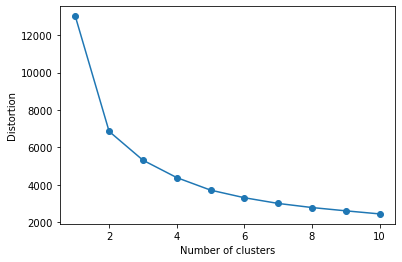

In [52]:
from sklearn.cluster import KMeans
distortions = []

for i in range(1,11):
    kmeans_i = KMeans(n_clusters=i, random_state = 0)
    kmeans_i.fit(X_features_scaled)
    distortions.append(kmeans_i.inertia_)
    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [53]:
kmeans = KMeans(n_clusters=3, random_state=0)
Y_labels = kmeans.fit_predict(X_features_scaled)

customer_df['ClusterLabel'] = Y_labels
customer_df

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log,ClusterLabel
0,12346,1,74215,326,0.693147,11.214735,5.789960,1
1,12347,182,2458,3,5.209486,7.807510,1.386294,2
2,12348,31,2341,76,3.465736,7.758761,4.343805,1
3,12349,73,631,19,4.304065,6.448889,2.995732,1
4,12350,17,197,311,2.890372,5.288267,5.743003,0
...,...,...,...,...,...,...,...,...
4333,18280,10,45,278,2.397895,3.828641,5.631212,0
4334,18281,7,54,181,2.079442,4.007333,5.204007,0
4335,18282,12,103,8,2.564949,4.644391,2.197225,1
4336,18283,721,1357,4,6.582025,7.213768,1.609438,2


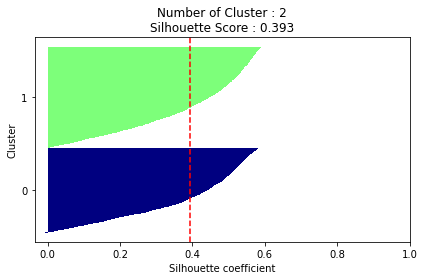

In [56]:
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib import cm

def silhouetteViz(n_cluster, X_features):
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    Y_labels = kmeans.fit_predict(X_features)
    silhouette_values = silhouette_samples(X_features, Y_labels, metric = 'euclidean')
    
    y_ax_lower, y_ax_upper = 0, 0
    y_ticks = []
    for c in range(n_cluster):
        c_silhouetees = silhouette_values[Y_labels == c]
        c_silhouetees.sort()
        
        y_ax_upper += len(c_silhouetees)
        color = cm.jet(float(c)/n_cluster)
        
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouetees,
                 height = 1.0, edgecolor = 'none', color = color)
        y_ticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouetees)
        
    silhouette_avg = np.mean(silhouette_values)
    plt.axvline(silhouette_avg, color = 'red', linestyle = '--')
    plt.title('Number of Cluster : '+ str(n_cluster) + '\n' \
              + 'Silhouette Score : ' + str(round(silhouette_avg,3)))
    plt.yticks(y_ticks, range(n_cluster))
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.tight_layout()
    plt.show()
    
silhouetteViz(2,X_features_scaled)
    

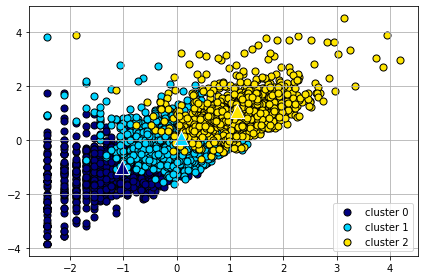

In [64]:
def clusterScatter(n_cluster, X_features):
    c_colors = []
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    Y_labels = kmeans.fit_predict(X_features)
    
    for i in range(n_cluster):
        c_color = cm.jet(float(i) / n_cluster)
        c_colors.append(c_color)
        plt.scatter(X_features[Y_labels == i, 0], X_features[Y_labels == i, 1],
                marker = 'o', color = c_color, edgecolor = 'black', s = 50,
                label = 'cluster ' + str(i))
    
    for i in range(n_cluster):
        plt.scatter(kmeans.cluster_centers_[i,0], kmeans.cluster_centers_[i,1],
                    marker = '^', color = c_colors[i], edgecolor = 'w', s = 200)
        
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()
        
clusterScatter(3, X_features_scaled)

In [65]:
best_cluster = 4

kmeans = KMeans(n_clusters=best_cluster, random_state=0)
Y_labels = kmeans.fit_predict(X_features_scaled)

In [66]:
customer_df['ClusterLabel'] = Y_labels
customer_df

customer_df.to_csv('Online_Retail_Customer_Cluster.csv')

In [67]:
customer_df.groupby('ClusterLabel')['CustomerID'].count()

ClusterLabel
0     891
1    1219
2     980
3    1248
Name: CustomerID, dtype: int64

In [68]:
customer_cluster_df = customer_df.drop(['Freq_log', 'SaleAmount_log', 'ElapsedDays_log'],
                                       axis = 1,
                                       inplace = False)

customer_cluster_df['SaleAmountAvg'] = customer_cluster_df['SaleAmount']/customer_cluster_df['Freq']
customer_cluster_df

,CustomerID,Freq,SaleAmount,ElapsedDays,ClusterLabel,SaleAmountAvg
0,12346,1,74215,326,3,74215.000000
1,12347,182,2458,3,2,13.505495
2,12348,31,2341,76,3,75.516129
3,12349,73,631,19,0,8.643836
4,12350,17,197,311,1,11.588235
...,...,...,...,...,...,...
4333,18280,10,45,278,1,4.500000
4334,18281,7,54,181,1,7.714286
4335,18282,12,103,8,0,8.583333
4336,18283,721,1357,4,2,1.882108


In [69]:
customer_cluster_df.drop(['CustomerID'],
                         axis = 1,
                         inplace = False).groupby('ClusterLabel').mean()

,Freq,SaleAmount,ElapsedDays,SaleAmountAvg
ClusterLabel,,,,
0,39.906846,369.824916,20.160494,17.068473
1,13.333060,134.980312,186.885972,21.684174
2,262.879592,3702.883673,15.916327,45.132580
3,66.714744,824.616186,114.036058,87.891581
